# Undirected scale-free networks

## Dependencies

In [1]:
%load_ext autoreload
%autoreload 2

from netin.models import PAHModel
# from netin import PA
# from netin import PAH
# from netin import PATC
# from netin import PATCH
# from netin import TCH
from netin import viz
from netin import stats

## Network parameters

In [2]:
n = 1000
k = 2
f_m = 0.1
h_MM = 0.9
h_mm = 0.9
tc = 0.8
seed = 1234

## Generation

In [ ]:
# PA: Preferential attachment only
g_pa = PA(n=n, k=k, f_m=f_m, seed=seed)
g_pa.generate()
g_pa.info()

In [3]:
# PAH: Preferential attachment and homophily
# g_pah = PAH(n=n, k=k, f_m=f_m, h_MM=h_MM, h_mm=h_mm, seed=seed)
# g_pah.generate()
# g_pah.info()
g_pah = PAHModel(N=n, m=k, f_m=f_m, h_m=h_mm, h_M=h_MM, seed=seed)
g_pah.simulate()

In [ ]:
# PATC: Preferential attachment and triadic closure
g_patc = PATC(n=n, k=k, f_m=f_m, tc=tc, seed=seed)
g_patc.generate()
g_patc.info()

In [ ]:
# PATCH: Preferential attachment, homophily, and triadic closure
g_patch = PATCH(n=5000, k=k, f_m=f_m, h_MM=h_MM, h_mm=h_mm, tc=tc,seed=seed)
g_patch.generate()
g_patch.info()

In [ ]:
# PATCH: Preferential attachment, homophily, and triadic closure
g_patch = PATCH(n=n, k=k, f_m=f_m, h_MM=h_MM, h_mm=h_mm, tc=tc, tc_uniform=False, seed=seed)
g_patch.generate()
g_patch.info()

In [ ]:
# PA: Preferential attachment only
g_tch = TCH(n=n, k=k, f_m=f_m, h_MM=h_MM, h_mm=h_mm, tc=tc, seed=seed)
g_tch.generate()
g_tch.info()

## Plots

In [4]:
viz.reset_style()
viz.set_paper_style()

### Graph

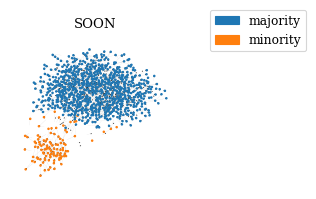

In [6]:
graphs = [g_pah.graph] #[g_pa, g_pah, g_patc, g_patch, g_tch]
viz.plot_graph(graphs, cell_size=2, share_pos=False, ignore_singletons=False)

### Node attributes

In [ ]:
# netin.stats.networks.get_node_metadata_as_dataframe
md_pa = g_pa.get_node_metadata_as_dataframe(n_jobs=10)
md_pah = g_pah.get_node_metadata_as_dataframe(n_jobs=10)
md_patc = g_patc.get_node_metadata_as_dataframe(n_jobs=10)
md_patch = g_patch.get_node_metadata_as_dataframe(n_jobs=10)
md_tch = g_tch.get_node_metadata_as_dataframe(n_jobs=10)


In [ ]:
# see example of genereate metadata 
md_pa.head()

In [ ]:
# all into a list
distributions = [md_pa, md_pah, md_patc, md_patch, md_tch]

#### Degree

In [ ]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='class_label',
                      kind='pdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

In [ ]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='class_label',
                      kind='cdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

In [ ]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='class_label',
                      kind='ccdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

#### Clustering

In [ ]:
viz.plot_powerlaw_fit(distributions, col_name='clustering', hue='class_label',
                      kind='ccdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

#### PageRank

In [ ]:
viz.plot_powerlaw_fit(distributions, col_name='pagerank', hue='class_label',
                      kind='ccdf', verbose=False, bbox=(1, 0.9), fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)